In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
np.set_printoptions(threshold=np.nan)

pdata = pd.read_csv("../Data/preprocessed_alcohol_balance_perperson.csv")
# pdata = pdata.drop(["Unnamed: 0"], axis=1)
pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
pdata

,Conditie,SubjectID,Height,Weight,Age,BMI,Alcohol,Alcohol_Class,Balance_MLrange,Balance_MLstdev,...,Balance_APrange,Balance_APstdev,Balance_APmeanVelocity,Balance_MeanVelocity,GaitVelocity,MovementVelocity,std_SegmentData,mad_SegmentData,mean_StepLength,Velocity
0,0,6,177,70.0,20,22.343516,0.00,0,10.421641,2.753424,...,8.955034,2.367358,2.674099,4.725911,1.130575,1.133883,0.051247,0.048709,0.664377,2.191667
1,1,6,177,70.0,20,22.343516,0.00,0,16.035550,4.575012,...,11.286483,2.829856,3.584385,10.095526,0.781418,0.786058,0.040890,0.046851,0.543385,2.741667
2,0,9,195,86.0,23,22.616700,0.00,0,12.458077,2.611063,...,5.751258,1.077709,1.763952,5.022392,1.093219,1.107944,0.022745,0.025316,0.700817,2.241667
3,1,9,195,86.0,23,22.616700,0.00,0,5.465266,1.562060,...,5.522362,1.254797,2.191313,4.220501,0.873605,0.884827,0.042159,0.020881,0.497828,2.825000
4,0,10,165,65.0,28,23.875115,0.00,0,10.540746,2.647560,...,3.566472,0.860375,1.478939,4.189830,0.962063,0.970962,0.106283,0.056155,0.516998,3.133333
5,1,10,165,65.0,28,23.875115,0.00,0,9.042003,2.349159,...,5.440031,1.296242,1.937522,4.302662,0.836216,0.866507,0.061240,0.074148,0.522667,2.833333
6,0,11,179,68.0,25,21.222808,0.00,0,11.943232,3.523579,...,5.495761,1.327192,2.224658,4.336345,0.970762,0.985713,0.021762,0.018457,0.586470,2.508333
7,1,11,179,68.0,25,21.222808,0.00,0,11.049547,2.697257,...,3.329707,0.765949,1.600825,3.650951,0.847874,0.854077,0.103909,0.042634,0.445404,3.383333
8,0,13,168,70.0,18,24.801587,0.00,0,11.288707,3.137366,...,6.476372,1.759603,2.440945,4.825908,1.077551,1.077653,0.025560,0.017800,0.639974,2.383333
9,1,13,168,70.0,18,24.801587,0.00,0,16.234744,5.294132,...,11.769357,2.818343,3.640210,7.224777,0.959407,0.963703,0.049625,0.036912,0.591725,2.750000


In [2]:
X = pdata.drop(['Conditie', 'SubjectID'], axis=1)
Y = pdata['Conditie']
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 2)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
list(X)

Num Features: 2
Selected Features: [False False False False False False False False False False False False
 False  True False False False  True False]
Feature Ranking: [17 16 18 14  7  8 13  4 15 10  9 11 12  1  3  5  6  1  2]


['Height',
 'Weight',
 'Age',
 'BMI',
 'Alcohol',
 'Alcohol_Class',
 'Balance_MLrange',
 'Balance_MLstdev',
 'Balance_MLmeanVelocity',
 'Balance_APrange',
 'Balance_APstdev',
 'Balance_APmeanVelocity',
 'Balance_MeanVelocity',
 'GaitVelocity',
 'MovementVelocity',
 'std_SegmentData',
 'mad_SegmentData',
 'mean_StepLength',
 'Velocity']

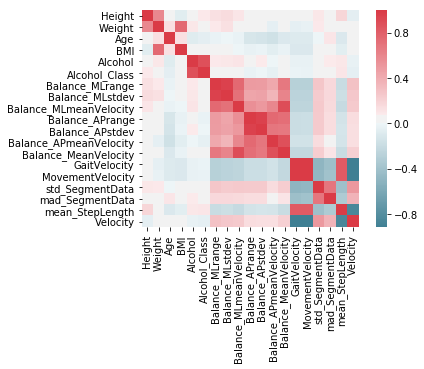

In [3]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [17]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    return X_train, X_test, y_train, y_test

collist =  ['SubjectID', 'Conditie','mean_StepLength', 'Velocity']
X_train, X_test, y_train, y_test = get_split_data(pdata, collist , 0.7)


X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)


In [18]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 86.17 %.


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [50]:
def make_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    
#     clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
#     clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
#     clf3 = GaussianNB()
#     clf4 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.01)  

#     eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('dt', clf4)], voting='hard')
#     eclf1 = eclf1.fit(X_train, y_train)

#     y_pred = eclf1.predict(X_test)
    
#     clf1 = DecisionTreeClassifier(max_depth=4)
#     clf2 = KNeighborsClassifier(n_neighbors=7)
#     clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
#     clf4 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
#     clf5 = GaussianNB()
#     eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
#                                         ('svc', clf3), ('lg', clf4), ('nb', clf5)],
#                             voting='soft', weights=[2, 1, 2, 1, 2])
#     eclf = eclf.fit(X_train, y_train)

#     y_pred = eclf.predict(X_test)
    
#     clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
#     clf.fit(X_train, y_train)
#     y_pred= clf.predict(X_test)

    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(X_train, y_train)  
    y_pred= clf.predict(X_test)
    return accuracy_score(y_test, y_pred)


make_decisions(pdata, collist)

0.8404255319148937

In [51]:
print('BMI, Age, mad_SegmentData:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','mean_StepLength', 'Velocity']) for i in range(100)]))

BMI, Age, mad_SegmentData: 0.8539361702127658
